In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import torch

In [3]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

In [34]:
from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer

import xgboost as xgb

In [5]:
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

import neural_lib as nl

In [6]:
PATH = 'C:\\Users\\Ayub\\Downloads\\datasets\\winequalityN.csv'
df = pd.read_csv(PATH)

In [7]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
X = df.drop(['quality'], axis=1)
y = df['quality']

In [9]:
def g(x):
    if 3<=x<=4:
        return 0
    if x==5:
        return 1
    if x ==6:
        return 2
    if x == 7:
        return 3
    if 8<=x<=9:
        return 4
    
y=y.apply(g)

In [10]:
#reduce the size of dataset
from sklearn.model_selection import train_test_split

X, X_tr, y, y_tr = train_test_split(X, y, test_size=11/13, stratify=y)

In [11]:
X.fillna(method='backfill', inplace=True)

In [12]:
X.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
cat_features=['type']

In [15]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=10,
#     verbose=5,
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
)

Learning rate set to 0.5
0:	learn: 1.2969276	test: 1.3452172	best: 1.3452172 (0)	total: 156ms	remaining: 1.4s
1:	learn: 1.1746715	test: 1.2591681	best: 1.2591681 (1)	total: 162ms	remaining: 648ms
2:	learn: 1.1060205	test: 1.2122515	best: 1.2122515 (2)	total: 168ms	remaining: 391ms
3:	learn: 1.0693031	test: 1.1874224	best: 1.1874224 (3)	total: 173ms	remaining: 260ms
4:	learn: 1.0306165	test: 1.1860565	best: 1.1860565 (4)	total: 180ms	remaining: 180ms
5:	learn: 0.9976266	test: 1.1862418	best: 1.1860565 (4)	total: 186ms	remaining: 124ms
6:	learn: 0.9763905	test: 1.1852217	best: 1.1852217 (6)	total: 194ms	remaining: 83.1ms
7:	learn: 0.9442505	test: 1.1783479	best: 1.1783479 (7)	total: 201ms	remaining: 50.3ms
8:	learn: 0.9326461	test: 1.1680111	best: 1.1680111 (8)	total: 207ms	remaining: 23ms
9:	learn: 0.9080544	test: 1.1645975	best: 1.1645975 (9)	total: 214ms	remaining: 0us

bestTest = 1.164597499
bestIteration = 9



In [16]:
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
f1_score(y_pred, y_test, average='macro')

0.2711359963473173

In [17]:
# onehot for numerical data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [18]:
def onehot_bin(df_train, df_test):
    def to_string(x):
        if type(x) not in ['string', 'float', 'int']:
            return str(x)
        return x
    
    X_train = df_train.copy()
    X_test = df_test.copy()
    X_train.index = [str(id) for id in list(X_train.index)]
    X_test.index = [str(id) for id in list(X_test.index)]

    categ_cols = X_train.select_dtypes(include=['category']).columns
    obj_cols = X_train.select_dtypes(include=['object']).columns
    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    onehotencoder = OneHotEncoder()
    
    for col in categ_cols:
        if X_train[col].isnull().sum() > 0:
            X_train[col] = X_train[col].cat.add_categories(['Unknown'])
            X_test[col] = X_test[col].cat.add_categories(['Unknown'])
            X_train[col] = X_train[col].fillna("Unknown")
            X_test[col] = X_[col].fillna("Unknown")

        X_train[col] = X_train[col].apply(to_string)
        X_test[col] = X_test[col].apply(to_string)
        res = onehotencoder.fit_transform(X_train[[col]])
        X_train[onehotencoder.categories_[0]] = res.toarray()
       
        res = onehotencoder.transform(X_test[[col]])
        X_test[onehotencoder.categories_[0]] = res.toarray()

        X_train.drop([col], axis=1, inplace=True)
        X_test.drop([col], axis=1, inplace=True)

    for col in obj_cols:

        X_train[col] = X_train[col].apply(to_string)
        X_test[col] = X_test[col].apply(to_string)
        res = onehotencoder.fit_transform(X_train[[col]])
        X_train[onehotencoder.categories_[0]] = res.toarray()
        res = onehotencoder.transform(X_test[[col]])
        X_test[onehotencoder.categories_[0]] = res.toarray()

        X_train.drop([col], axis=1, inplace=True)
        X_test.drop([col], axis=1, inplace=True)


    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    
    for col in num_cols:
        discret = KBinsDiscretizer(strategy = 'quantile', n_bins=4, encode = "onehot-dense")
        data_train = discret.fit_transform(X_train[[col]])
        data_test = discret.transform(X_test[[col]])
        edges = discret.bin_edges_[0]
        categ_names = [col+f'|{edges[i]}:{edges[i+1]}|' for i in range(len(edges)-1)]
        X_train[categ_names] = data_train
        X_test[categ_names] = data_test
        
        X_train.drop([col], axis=1, inplace=True)
        X_test.drop([col], axis=1, inplace=True)
                

    cols = X_train.columns
    for col in cols:
        X_train[col] = X_train[col].apply(lambda x : False if (x==0 or x == '0') else True)
        X_test[col] = X_test[col].apply(lambda x : False if (x==0 or x == '0') else True)

    return X_train, X_test

In [19]:
X_train_bin, X_test_bin = onehot_bin(X_train, X_test)

In [20]:
K_train = FormalContext.from_pandas(X_train_bin)
K_train

FormalContext (699 objects, 46 attributes, 9087 connections)
    |fixed acidity|4.4:6.4||fixed acidity|6.4:7.0||fixed acidity|7.0:7.7||fixed acidity|7.7:15.6||volatile acidity|0.08:0.23||...|alcohol|9.5:10.3||alcohol|10.3:11.3||alcohol|11.3:14.0||red|0.0:1.0||white|0.0:1.0||
4105|                      |                     X|                      |                       |                           |...|                 |                 X|                  |           X|             X|
5906|                      |                      |                      |                      X|                           |...|                 |                  |                 X|           X|             X|
203 |                      |                     X|                      |                       |                           |...|                 |                  |                 X|           X|             X|
585 |                      |                      |                     X|     

In [21]:
L = ConceptLattice.from_context(K_train, is_monotone=True, algo='Sofia')
len(L)

101

In [22]:
from sklearn.metrics import f1_score

for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds, average='macro')

In [23]:
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:7])

len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects


True

In [24]:
L.measures['f1_score']

array([0.01434483, 0.05483349, 0.05264682, 0.0791123 , 0.06254724,
       0.07415046, 0.07303262, 0.08097147, 0.06092985, 0.06883583,
       0.09060639, 0.05310086, 0.08167952, 0.09825913, 0.10361381,
       0.0910249 , 0.09940649, 0.09972181, 0.0985107 , 0.10976789,
       0.07617568, 0.09191701, 0.09365447, 0.08738608, 0.05626885,
       0.06234486, 0.07275097, 0.07191107, 0.08825047, 0.11143553,
       0.09390362, 0.10742157, 0.11274181, 0.06809108, 0.11116328,
       0.07321331, 0.07664074, 0.11174605, 0.0795353 , 0.08296067,
       0.10242747, 0.1051061 , 0.08970814, 0.11280997, 0.09583719,
       0.12076569, 0.10216494, 0.09098158, 0.08792913, 0.09333535,
       0.0857678 , 0.08451   , 0.11987783, 0.12259622, 0.11652693,
       0.11498007, 0.08432714, 0.11075345, 0.10784628, 0.10341164,
       0.08615214, 0.10796377, 0.08894213, 0.11511921, 0.11633256,
       0.12206029, 0.11142485, 0.10573453, 0.10821269, 0.09328266,
       0.08046853, 0.0806584 , 0.10727211, 0.10250201, 0.09377

In [25]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

In [26]:
vis = LineVizNx(node_label_font_size=6, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

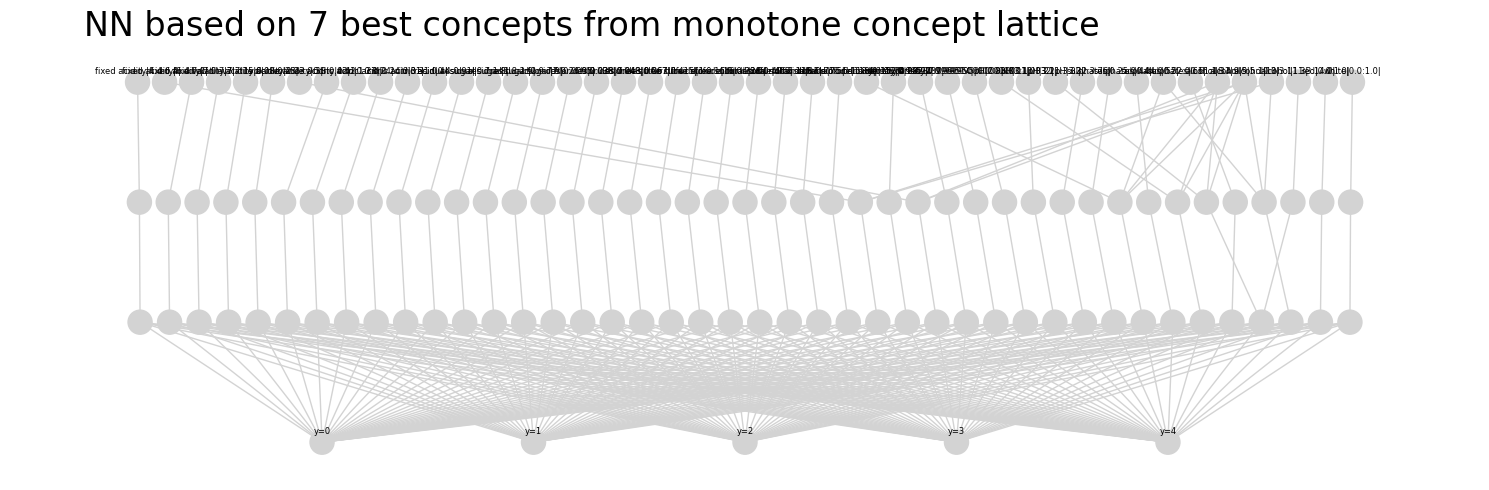

In [29]:
fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['lightgray' for el_i in range(len(cn.poset))]
)
plt.title(f'NN based on 7 best concepts from monotone concept lattice', loc='left', x=0.05, size=24)

plt.subplots_adjust()
plt.tight_layout()
plt.show()

In [30]:
cn.fit(X_test_bin, y_test)

In [31]:
print('Class prediction', cn.predict(X_test_bin).numpy())
print('Class prediction with probabilities', cn.predict_proba(X_test_bin).detach().numpy())
print('True class', y_test.values)

Class prediction [2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2
 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 1 2 1 2 2 1 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 1 2 1 1 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 1 2 2 1 2 2
 2 2 2 2 2 1 2 2 2 1 2 2 1 2 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 1 2 2 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 2 2 2 2 2
 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2
 2 2 2 2]
Class prediction with probabilities [[1.7535048e-12 2.9847340e-13 1.0000000e+00 1.4295375e-12 2.3692133e-12]
 [4.8074719e-15 4.9960008e-17 1.0000000e+00 7.8611095e-15 1.8460656e-14]
 [2.7323026e-09 6.2543091e-07 9.9999940e-01 3.2649961e-09 5.7913052e-09]
 ...
 [2.1864251e-07 3.0753431e-01 6.9246513e-01 1.9442723e-07 1.9812775e-07]
 [1.5960284e-14 2.8231473e-13 1.0000000e

In [32]:
f1_score(cn.predict(X_test_bin).numpy(), y_test, average='macro')

0.2564238230904897

In [35]:
##Compare with XGboost on the same set of attributes
xgb_model = xgb.XGBClassifier(objective="multi:softprob", enable_categorical=True, random_state=42)
xgb_model.fit(X_train_bin, y_train)

y_pred = xgb_model.predict(X_test_bin)

print(confusion_matrix(y_test, y_pred))
print('f1_score is ', f1_score(y_test, y_pred, average='macro'))

[[ 0  9  3  0  0]
 [ 3 49 38  2  1]
 [ 0 49 67 17  0]
 [ 0  6 27 17  0]
 [ 0  1  5  5  1]]
f1_score is  0.29615119180336574


In [36]:
edge_weights = cn.edge_weights_from_network()

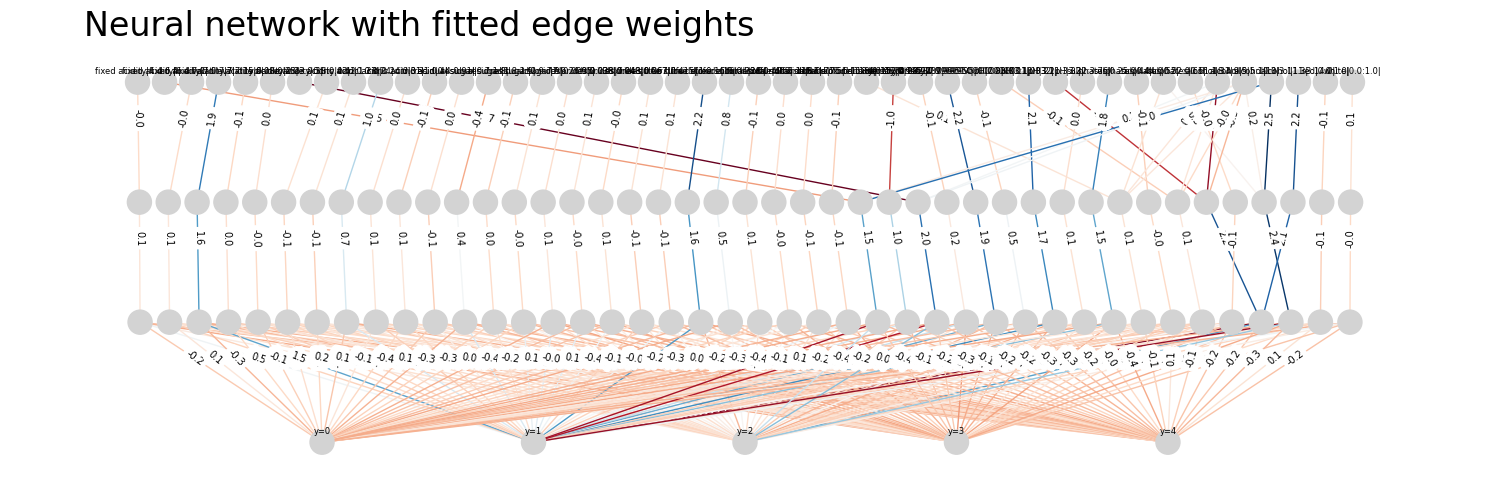

In [37]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7, font_size=7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_network.png')
plt.show()